<a href="https://colab.research.google.com/github/arianab68/GoogleColab/blob/master/Ariana.911EmergencyCalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study

Congrats! You have been contracted to conduct a brief analysis of a dataset containing ememrgency calls in order to determine the allocation of funds to you local authorities.  This analysis will play a role in deciding changes to the emergency response department.

The data is based in 911 emergency calls and your job is to determine a variety of issues regarding said calls.

1. Using Pandas and Numpy, analyse the data and come up with 5 questions that you would like to answer about the data.

2. the instructor will provide a rnage of questions to answer and you should use your knowledge to complte them as a team.

Group Members:
Sarah
Safiyyah
MJ

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/911.csv')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


My Groups Questions:


What are the top five reasons for calling ?

In [32]:
data['title'].value_counts().head(5)

The top five reasons are Vehicle Accident, Disabled Vehicle, Fire Alarm, Respitory Emergency and Cardiac Emergency.

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

What are the top 5 zipcodes for 911 calls? 

In [10]:
data['zip'].value_counts().head(5)

The top 5 zipcodes for 911 calls are 6979,6643,4854,4748 and 3172.

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What is the most common hour of the day to call ? 

In [56]:
data['Department'] = data['title'].apply(lambda title: title.split('!')[0])
data['Reason'] = data['title'].apply(lambda title: title.split('!')[0])

In [57]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
type(data['timeStamp'])

pandas.core.series.Series

In [58]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [59]:
dmap = {0:'12am',1:'1am',2:'2am',3:'3am',4:'4am',5:'5am',6:'6am',7:'7am',8:'8am',9:'9am',10:'10am',11:'11am',12:'12pm',13:'1pm',14:'2pm',15:'3pm',16:'4pm',17:'5pm',18:'6pm',19:'7pm',20:'8pm',21:'9pm',22:'10pm',23:'11pm'}

In [60]:
data['Hour'] = data['Hour'].map(dmap)

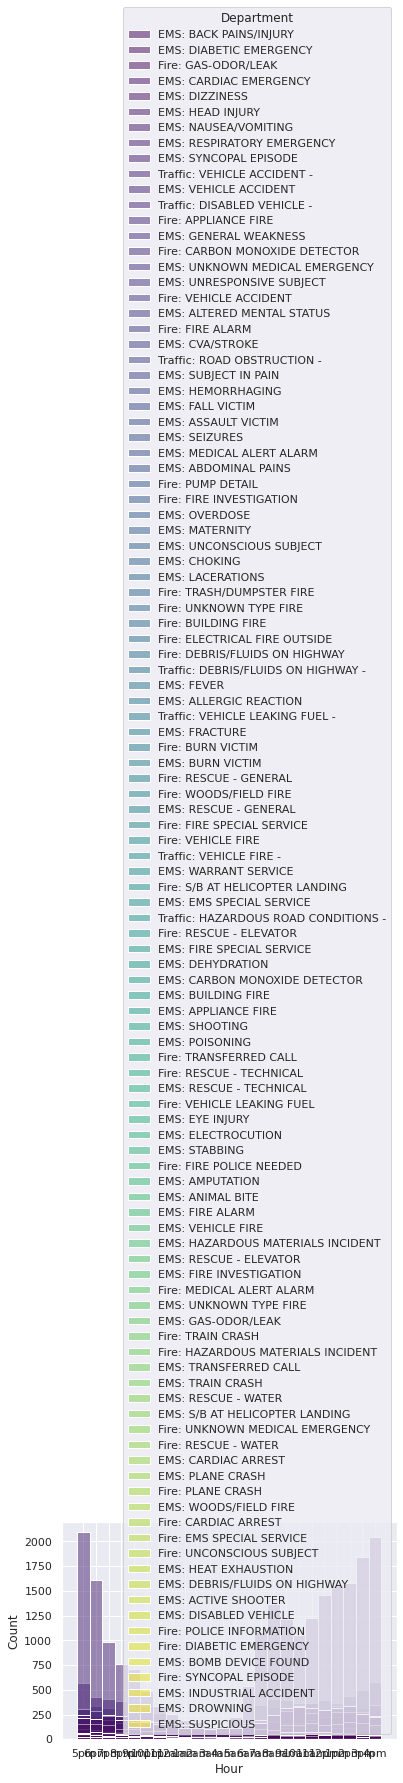

In [64]:
sns.histplot(x='Hour',data=data,hue='Department',palette='viridis')


The most common hour of the day to call is: 

What are the least common townships for 911 calls?

In [33]:
data['twp'].value_counts().tail(5)

The least common townships for 911 calls are Lehigh County, Phila County, Green Lane, Salford and Bryn Athyn.

BRYN ATHYN       173
SALFORD          163
GREEN LANE        51
PHILA COUNTY      43
LEHIGH COUNTY     30
Name: twp, dtype: int64

What are the addresses with more than 5 calls ?

In [68]:

pd.value_counts(data['addr']).iloc[:5]

The addresses with more than 5 calls to 911 are SHANNONDELL DR & SHANNONDELL BLVD, MAIN ST & OLD SUMNEYTOWN PIKE,THE FAIRWAY  & RYDAL RD,GULPH RD & KIRK AVE and EVERGREEN RD & W LIGHTCAP RD.

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
Name: addr, dtype: int64